In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = np.loadtxt('DecayTimesData.txt')
data.shape

(10000,)

In [24]:
def nll(theta,t):
    f,tau1,tau2 = theta
    return -np.sum(np.log(f*(1/tau1)*np.exp(-t/tau1)+(1-f)*(1/tau2)*np.exp(-t/tau2)))  

def pdf(theta,t):
    f,tau1,tau2 = theta
    return f*(1/tau1)*np.exp(-t/tau1)+(1-f)*(1/tau2)*np.exp(-t/tau2)

In [16]:
tnc_result = optimize.minimize(nll, [ 0.74849482,  0.19783713,  1.30720412], args=(data),method='TNC')
tnc_result

     fun: 885.07133658680982
     jac: array([ 0.00713953, -0.01145963,  0.00449063])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 3
     nit: 1
  status: 1
 success: True
       x: array([ 0.74849409,  0.1978367 ,  1.30720393])

In [4]:
nm_result = optimize.minimize(nll, [ 0.74849482,  0.19783713,  1.30720412], args=(data),method='Nelder-mead')
nm_result

 final_simplex: (array([[ 0.74849482,  0.19783713,  1.30720412],
       [ 0.74849624,  0.19783055,  1.30721464],
       [ 0.7484941 ,  0.19783655,  1.30712747],
       [ 0.7485167 ,  0.19783941,  1.30723005]]), array([ 885.0713366 ,  885.07133929,  885.07133961,  885.07134091]))
           fun: 885.07133659655426
       message: 'Optimization terminated successfully.'
          nfev: 84
           nit: 50
        status: 0
       success: True
             x: array([ 0.74849482,  0.19783713,  1.30720412])

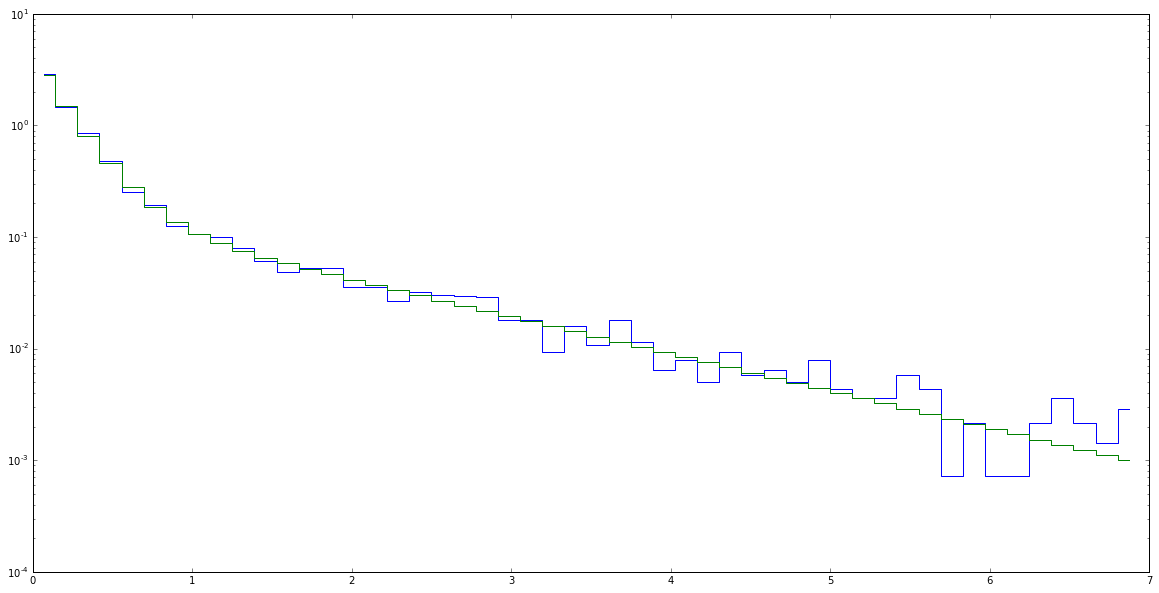

In [38]:
f,bins = np.histogram(data,bins=50,normed=True)
step = bins[1]-bins[0]
plt.figure(figsize=(20,10))
plt.plot(bins[1:]-step/2,f,drawstyle='steps-mid')
plt.plot([t for t in np.arange(step/2,7,step)],[pdf(tnc_result['x'],t) for t in np.arange(step/2,7,step)],drawstyle='steps-mid')
plt.yscale('log')

In [59]:
def errors(params,idx,bounds):
    plt.figure(figsize=(20,10))
    if idx == 0:
        plt.plot([params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
             [nll([params[0]+dx,params[1],params[2]],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
    elif idx == 1:
        plt.plot([params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
             [nll([params[0],params[1]+dx,params[2]],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
    elif idx ==2 :
        plt.plot([params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
             [nll([params[0],params[1],params[2]+dx],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
    else:
        print('invalid idx input')
    plt.plot([params[idx]+bounds[0],params[idx]+bounds[1]],[nll(params,data)+0.5,nll(params,data)+0.5])
    plt.plot([params[idx]],[tnc_result['fun']],'ro')

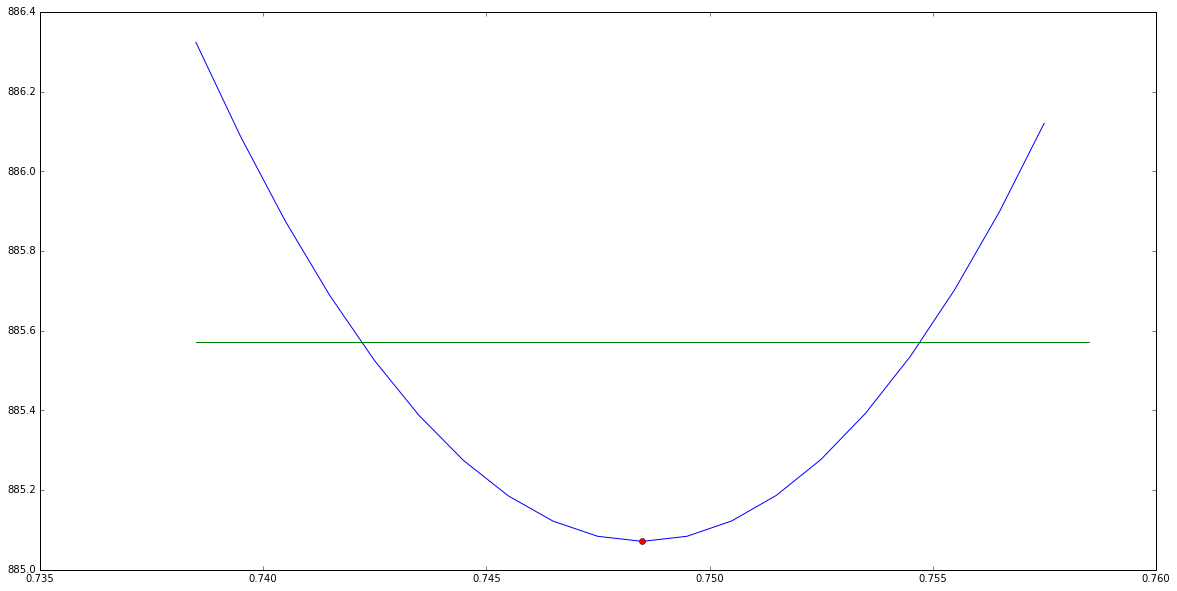

In [60]:
errors(tnc_result['x'],0,[-0.01,0.01,0.001])

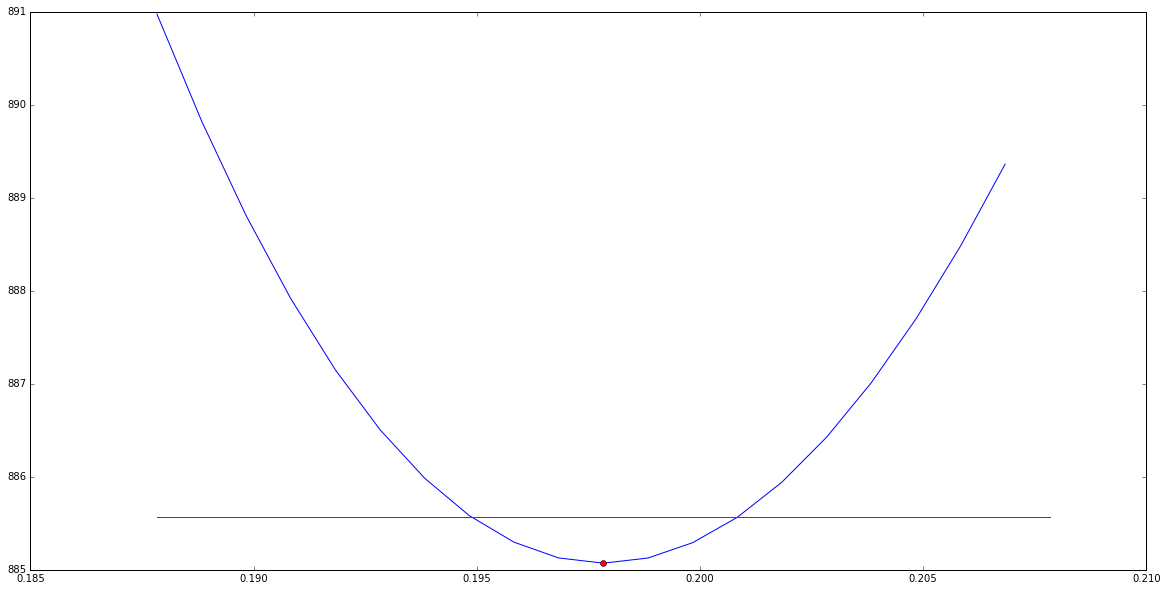

In [61]:
errors(tnc_result['x'],1,[-0.01,0.01,0.001])

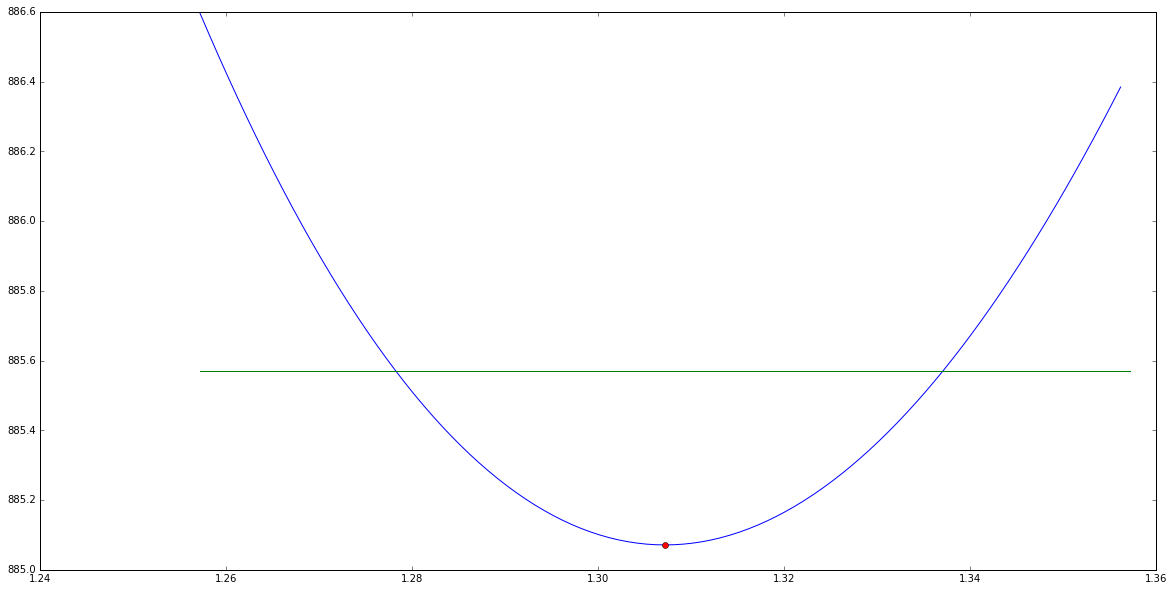

In [66]:
errors(tnc_result['x'],2,[-0.05,0.05,0.001])

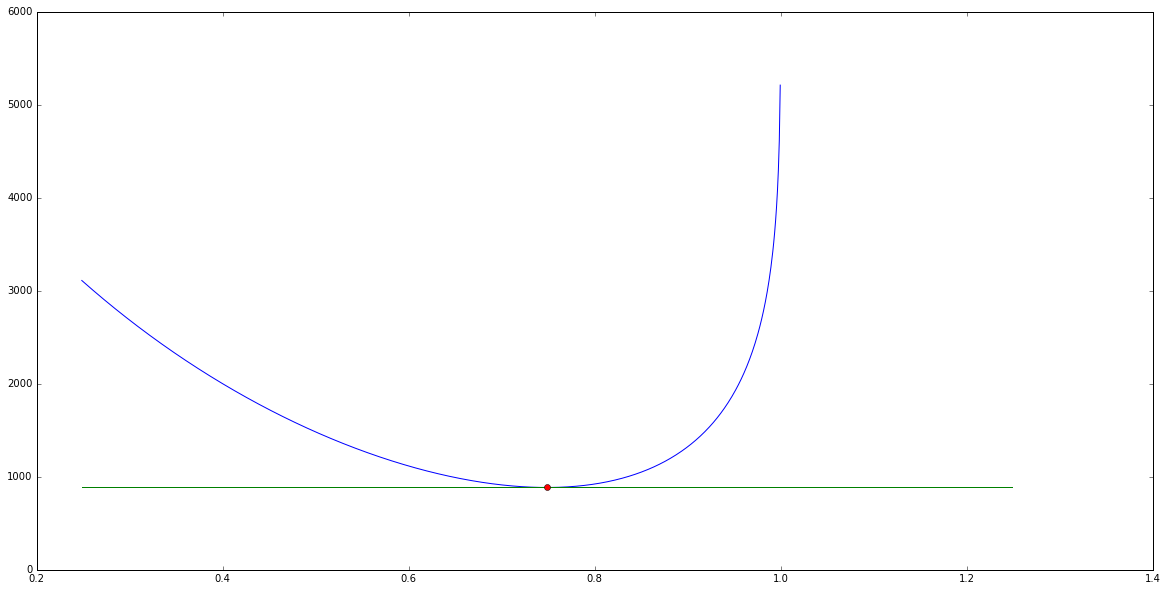

In [63]:
errors(tnc_result['x'],0,[-0.5,0.5,0.001])

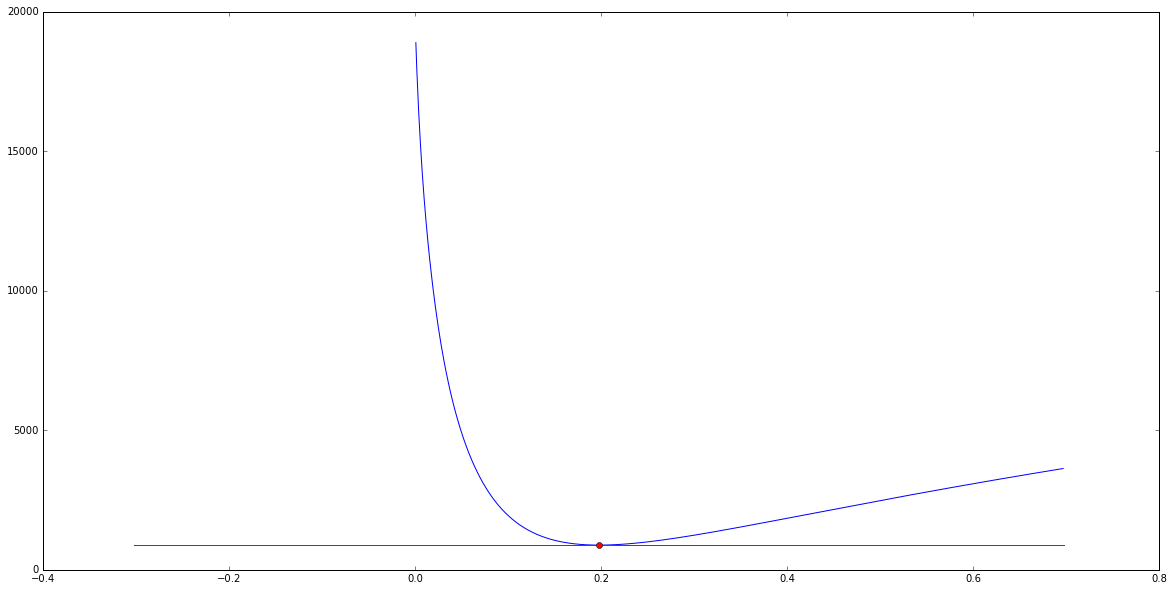

In [65]:
errors(tnc_result['x'],1,[-0.5,0.5,0.001])

In [ ]:
def errors(params,idx,bounds):
    plt.figure(figsize=(20,10))
    if idx == 0:
        plt.plot([params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
             [nll([params[0]+dx,params[1],params[2]],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
    elif idx == 1:
        plt.plot([params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
             [nll([params[0],params[1]+dx,params[2]],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
    elif idx ==2 :
        plt.plot([params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
             [nll([params[0],params[1],params[2]+dx],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])])
    else:
        print('invalid idx input')
    plt.plot([params[idx]+bounds[0],params[idx]+bounds[1]],[nll(params,data)+0.5,nll(params,data)+0.5])
    plt.plot([params[idx]],[tnc_result['fun']],'ro')

In [75]:
bounds = [-0.01,0.01,0.001]
X = [tnc_result['x'][0]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]
Y = [tnc_result['x'][1]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]
Z = [nll([X[i],Y[i],tnc_result['x'][2]],data) for i in range(0,len(X))]

In [79]:
len(X)

20

In [ ]:
plt.figure(figsize=(20,10))
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')